<a href="https://colab.research.google.com/github/Aravindh4404/FYPSeagullClassification01/blob/main/ResNet02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# Import os for drive mounting and file path handling
import os

# Mount Google Drive (if using Google Colab)
from google.colab import drive
drive.mount('/content/drive')
# Create ImageDataGenerators with augmentation and validation split
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Set the data root directory
data_root = "/content/drive/My Drive/FYP/Dataset/train"

# Verify if the data directory exists
if not os.path.exists(data_root):
    raise FileNotFoundError(f"The specified data directory '{data_root}' does not exist. Please check the path and ensure the directory is accessible.")

# Define training and validation generators
train_generator = train_datagen.flow_from_directory(
    data_root,
    subset="training",
    shuffle=True,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32
)

valid_generator = valid_datagen.flow_from_directory(
    data_root,
    subset="validation",
    shuffle=False,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32
)

# Print class indices
print("Class Indices:", train_generator.class_indices)

Mounted at /content/drive
Found 743 images belonging to 2 classes.
Found 184 images belonging to 2 classes.
Class Indices: {'Glaucous_Winged_Gull': 0, 'Slaty_Backed_Gull': 1}


171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet101 (Functional)               │ (None, 7, 7, 2048)          │      42,658,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,224,066 (164.89 MB)

 Trainable params: 9,493,122 (36.21 MB)

 Non-trainable params: 33,730,944 (128.67 MB)

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 281s 9s/step - accuracy: 0.5176 - loss: 1.0381 - val_accuracy: 0.5562 - val_loss: 0.7792
Epoch 2/40
 1/23 ━━━━━━━━━━━━━━━━━━━━ 5s 228ms/step - accuracy: 0.6250 - loss: 0.7888

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


23/23 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.6250 - loss: 0.7888 - val_accuracy: 0.0000e+00 - val_loss: 1.3707
Epoch 3/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 57s 920ms/step - accuracy: 0.5749 - loss: 0.8684 - val_accuracy: 0.5562 - val_loss: 0.7435
Epoch 4/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5938 - loss: 0.9750 - val_accuracy: 0.0000e+00 - val_loss: 1.2203
Epoch 5/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.6622 - loss: 0.7379 - val_accuracy: 0.5562 - val_loss: 0.7264
Epoch 6/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7188 - loss: 0.4866 - val_accuracy: 0.0000e+00 - val_loss: 1.1115
Epoch 7/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 38s 909ms/step - accuracy: 0.6335 - loss: 0.7454 - val_accuracy: 0.5562 - val_loss: 0.6998
Epoch 8/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5312 - loss: 1.0776 - val_accuracy: 0.0000e+00 - val_loss: 0.9843
Epoch 9/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 41s 948ms/step - accuracy: 0.6266 - loss: 0.7386 - val_accuracy: 0.55

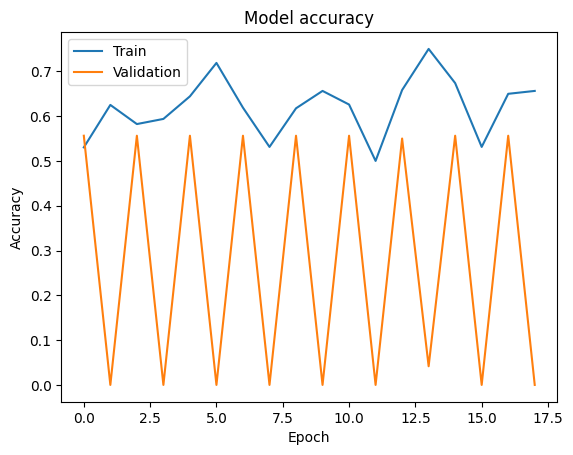

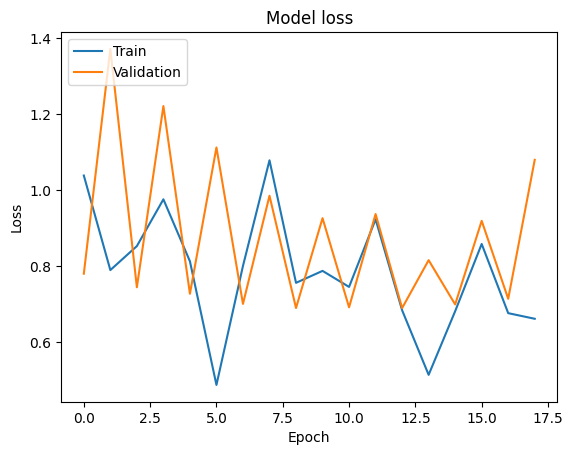

In [3]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Use EfficientNetB0 or ResNet101
base_model = tf.keras.applications.ResNet101(  # You can replace this with ResNet101 if preferred
    weights='imagenet',
    include_top=False,  # Exclude the classification layer
    input_shape=(224, 224, 3)
)

# Unfreeze the last few layers of the base model for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-20]:  # Freeze all layers except the last 20
    layer.trainable = False

# Define the model architecture with additional layers
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)

# Add a GlobalAveragePooling layer
x = layers.GlobalAveragePooling2D()(x)

# Add Batch Normalization
x = layers.BatchNormalization()(x)

# Add a fully connected layer with more neurons
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)  # Increase dropout rate to 0.5 to avoid overfitting

# Add another dense layer (optional)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)

# Final output layer
outputs = layers.Dense(train_generator.num_classes, activation='softmax')(x)

# Compile the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile with a lower learning rate to allow fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),  # Reduced learning rate for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Summary of the updated model
model.summary()

# Early stopping and checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('/content/drive/My Drive/FYP/MODELS/efficientnet_best_model.keras', save_best_only=True)

# Train the model with the updated architecture
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=40,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

# Evaluate the model
test_loss, test_acc = model.evaluate(valid_generator, verbose=2)
print(f"Validation Loss: {test_loss}")
print(f"Validation Accuracy: {test_acc}")

# Save the final model
model.save('/content/drive/My Drive/FYP/MODELS/efficientnet_final_model.keras')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
